In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[0] minimum sample size per bin: 78
67 73 [3.35 3.47]
[1] minimum sample size per bin: 78
61 72 [3.23 3.45]
10 1 4.252154467009631 1.0656022367666107
11 1 3.882130338447501 1.0597230333184464
12 1 3.571367651747992 1.0548112121813913
13 1 3.306681986352252 1.050646106835831
14 1 3.078530716655152 1.047069434913027
[2] minimum sample size per bin: 67
52 71 [3.05 3.43]
5 1 3.7721268605202622 1.129243234657234
6 1 3.190406003934181 1.1082332935251626
[3] minimum sample size per bin: 73
55 84 [3.11 3.69]
2 1 3.874979933704244 1.3103706971044482
5 2 3.2216820872731327 1.2514649491351946
7 3 3.4133608262829767 1.2684342882037154
8 3 3.0504826096427435 1.2365218608121753
9 4 3.5180711118422923 1.2778127834700252
10 4 3.2216820872731327 1.2514649491351946
[0] minimum sample size per bin: 48
[1] minimum sample size per bin: 49
[2] minimum sample size per bin: 47
[3] minimum sample size per bin: 52
[0] minimum sample size per bin: 53
[1] minimum sample size per bin: 47
[2] minimum sample size pe

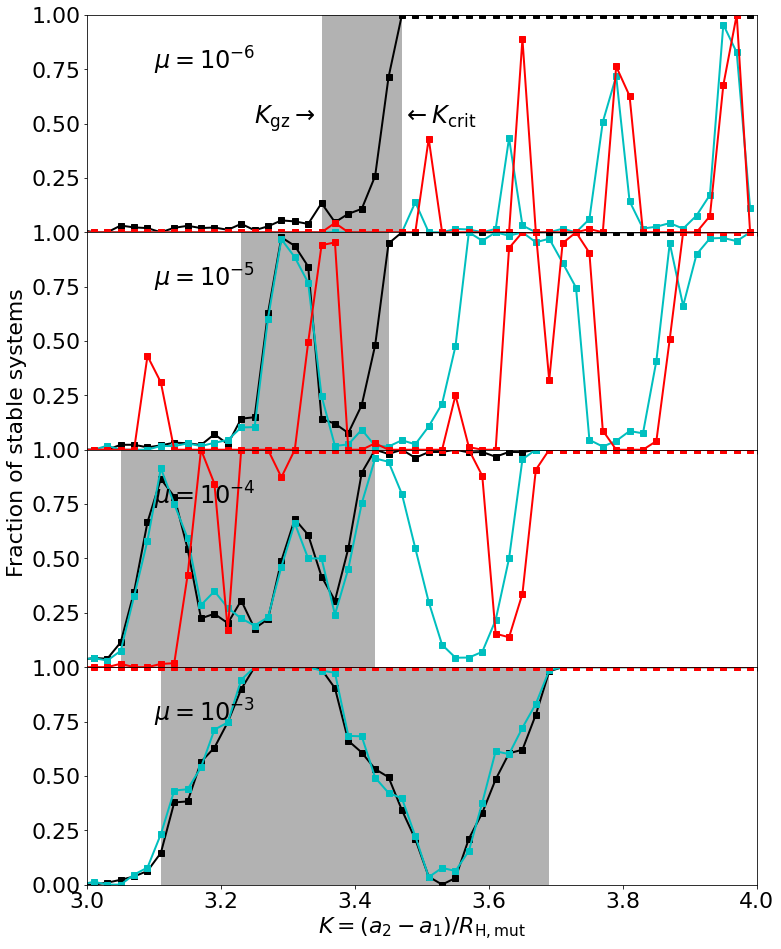

In [34]:
def resonance_to_K(res_val,mu):
    #P1 = 1**(-1.5)
    #P2 = P1*res_val
    a1 = 1. #P1**(2./3.)
    a2 = a1*(res_val)**(2./3.) #P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH, a2

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)

Kcr0 = np.zeros(4)
Kgz0 = np.zeros(4)

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    #data = np.load('./data/1p/t0-m1e-%1d-new.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2)
    
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print(igzmin,igzmax,bins[[igzmin,igzmax]])
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.3)
    
    Kcr0[iii] = bins[igzmax]
    Kgz0[iii] = bins[igzmin]
    
    for p in np.arange(20)+1:
        for q in np.arange(1)+1:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='r',ls='--')
            if (Kres>3) and (Kres<4.5):
                print(p,q,Kres,a2)

    for p in np.arange(10)+1:
        for q in np.arange(5)+2:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='b',ls='--')
            if (Kres>3.0) and (Kres<3.6):
                print(p,q,Kres,a2)
                
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])
    axs[iii].text(3.1,0.75,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
axs[0].text(Kgz0[0],0.5,r'$K_{\rm gz} \rightarrow$ ',fontsize=24,ha='right')
axs[0].text(Kcr0[0],0.5,r'$\leftarrow K_{\rm crit}$',fontsize=24,ha='left')

    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([3.0,4.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-fraction_nf-wRH-rev2.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-fraction_nf-wRH-rev2.png',bbox_inches='tight',transparent=True)

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt4-res/p1m%1dt0.npy'%(6-iii))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='c',lw=2)
    
for iii in [0,1,2,3]:
    
    mu = mu_l[iii]

    eps1range,nconjcrit = np.loadtxt('../data/map5K/res-Rm/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range#/rH
    eps1range = (rH/(1.-0.5*K*rH))*K
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(K,bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(K[Tinst>1e5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='r',lw=2)

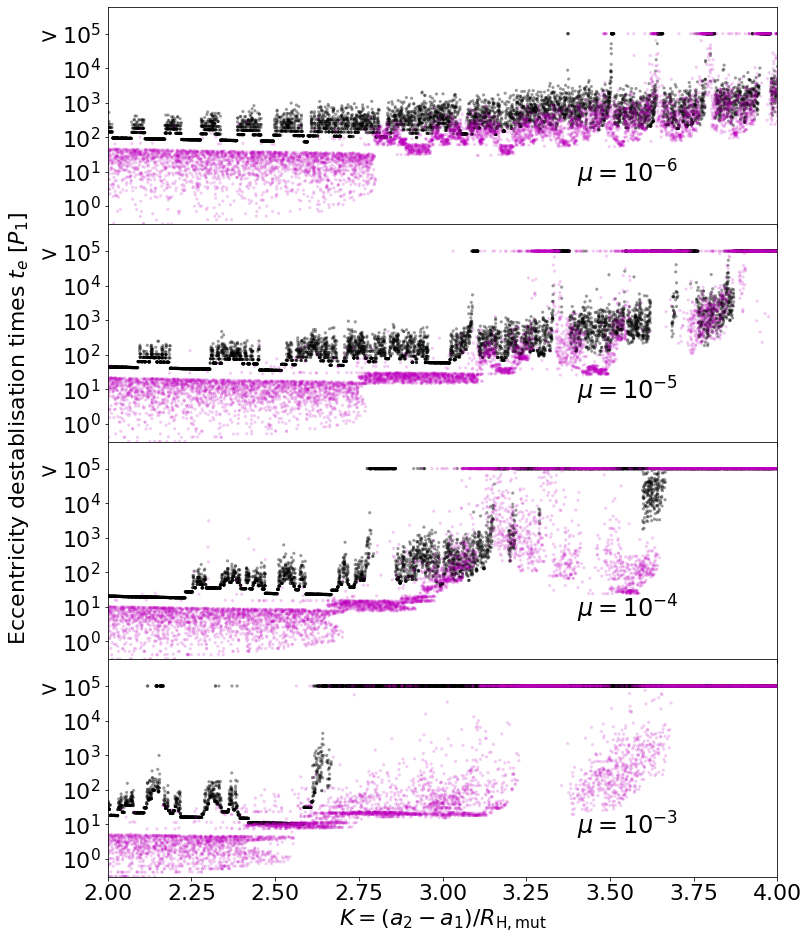

In [36]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]
K_syn_list = [2.616161616161616,2.595959595959596,2.5353535353535355,2.393939393939394]

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('../data/map5K/res-Rm/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range#/rH
    eps1range = (rH/(1.-0.5*K*rH))*K
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([3.0e-1,6e5])
    axs[iii].set_yticks([1e0,1e1,1e2,1e3,1e4,1e5])
    axs[iii].set_yticklabels([r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])

    
    axs[iii].text(3.4,5,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Eccentricity destablisation times $t_{e}$ [$P_1$]')

#axs[1].axvline(x=3.35)
#axs[2].axvline(x=2.83)

axs[-1].set_xlim([2.0,4.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-time_nf-map-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_nf-map-rev.png',bbox_inches='tight',transparent=True)

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2][data[:,0]>0.5]
    Tinst = data[:,3][data[:,0]>0.5]
    #axs[iii].scatter(K,Tinst,c='m',s=10,alpha=0.2,edgecolors='none',rasterized=True)
    
    
for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt4-res/p1m%1dt0.npy'%(6-iii))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='m',s=10,alpha=0.2,edgecolors='none',rasterized=True)

t4: 4.99
t4: 3.87
t4: 3.21
t4: 2.67
t2: 3.73
t2: 3.5700000000000003
t2: 3.1500000000000004
t2: 2.6500000000000004


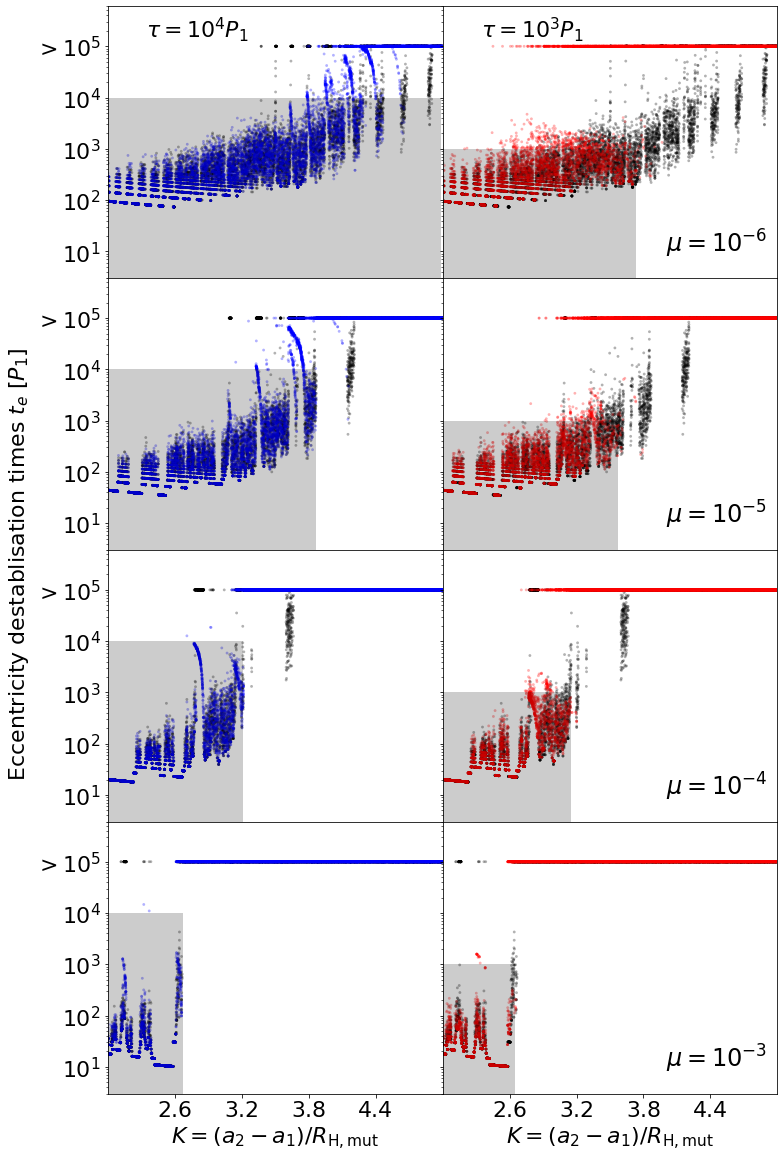

In [37]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

K_syn_list = [2.616161616161616,2.595959595959596,2.5353535353535355,2.393939393939394]

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0,wspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('../data/map5K/res-Rm/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range#/rH
    eps1range = (rH/(1.-0.5*K*rH))*K
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,0].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].set_yscale('log')
    axs[iii,0].set_ylim([3.0e0,6e5])
    axs[iii,0].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,0].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])  
    axs[iii,1].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e5])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,1].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$']) 
    axs[iii,1].text(4.0,1e1,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,4,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    

    #K_crit_fit = np.interp(4, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,0].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
    #K_crit_fit = np.interp(2, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,1].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)


for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('../data/map5K/res-Rm/m%1dt4.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range#/rH
    eps1range = (rH/(1.-0.5*K*rH))*K
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,0].scatter(K,Tinst,c='b',s=8,alpha=0.3,edgecolors='none',rasterized=True)

    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(K,bins=edges)
    
    safe_hist, edges = np.histogram(K[Tinst>=(1e5-10)],bins=edges)
    
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    #print(igzmin,igzmax,bins[[igzmin,igzmax]])    
    K_crit = bins[igzmax]
    print('t4:',K_crit)
    axs[iii,0].fill_between([2,K_crit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)

    

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('../data/map5K/res-Rm/m%1dt3.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range#/rH
    eps1range = (rH/(1.-0.5*K*rH))*K
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,1].scatter(K,Tinst,c='r',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(K,bins=edges)
    
    safe_hist, edges = np.histogram(K[Tinst>=(1e5-10)],bins=edges)
    
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    #print(igzmin,igzmax,bins[[igzmin,igzmax]])    
    K_crit = bins[igzmax]    
    print('t2:',K_crit)
    axs[iii,1].fill_between([2,K_crit],[1e-2,1e-2],[1e3,1e3],edgecolor='none',facecolor='k',alpha=0.2)
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()

axs[0,0].text(2.8,1.5e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.8,1.5e5,r'$\tau=10^{3}P_1$',ha='center')

axs[-1,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[-1,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2,0].set_ylabel(r'                                   Eccentricity destablisation times $t_{e}$ [$P_1$]')

axs[-1,0].set_xlim([2.0,5.0])
axs[-1,1].set_xlim([2.0,5.0])
axs[-1,0].set_xticks([2.6,3.2,3.8,4.4])
axs[-1,1].set_xticks([2.6,3.2,3.8,4.4])

#plt.savefig('./pics/pics-time_wf-map-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_wf-map-rev.png',bbox_inches='tight',transparent=True)

In [5]:

def read_sweep(t):

    res_list = np.zeros((31,3))
    for i in np.arange(31):
        iii = i+30
        mu = 0.1**(iii*0.1)
        eps1range,nconjcrit = np.loadtxt('./data/map5K/res-sweep-Rm/m%2dt%1d.dat'%(iii,t))
        neps1 = len(eps1range)
        rH = (float(mu)/3)**(1/3) 
        k = eps1range#/rH
        eps1range = (rH/(1.-0.5*k*rH))*k
        tsyn = 2/(3*eps1range) 
        tinst = nconjcrit*tsyn
        tmax = 1e5 # if we want to cap it to 1e5 P1
        tinst = np.minimum(tinst, tmax)
        edges = np.linspace(2,5,151)
        bins = 0.5*(edges[:-1]+edges[1:])
        tot_hist, edges = np.histogram(k,bins=edges)
        safe_hist, edges = np.histogram(k[tinst>=(1e5-tsyn*2)],bins=edges)    
        dpc = 0.04
        igzmin = np.argmax(safe_hist/tot_hist>dpc)
        igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
        res_list[i,:] = np.array([mu,bins[igzmin],bins[igzmax]])

    return res_list


sweep_t0 = read_sweep(0)
sweep_t3 = read_sweep(3)

[1.61330097] [[0.00039136]]


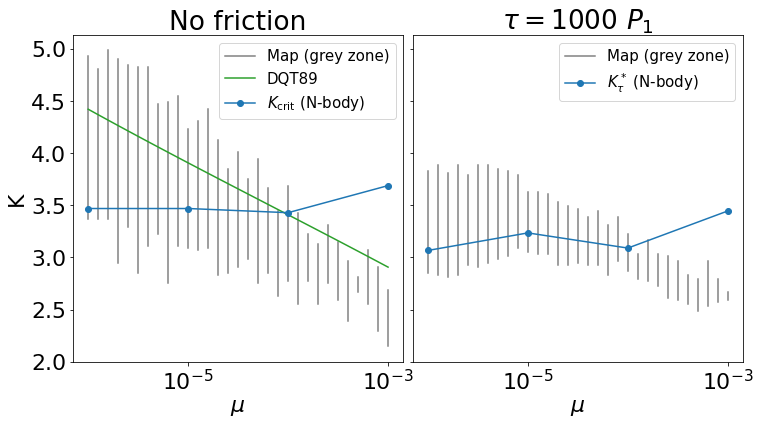

In [6]:
fig,axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,6))
fig.subplots_adjust(hspace=0.0,wspace=0.03)

mu = sweep_t0[:,0]
for i in range(len(sweep_t0[:,0])):
    mui = mu[i]
    axs[0].semilogx([mui,mui],[sweep_t0[i,1],sweep_t0[i,2]], "0.5")
    axs[1].semilogx([mui,mui],[sweep_t3[i,1],sweep_t3[i,2]], "0.5")

axs[0].semilogx([],[], "0.5", label="Map (grey zone)")
axs[1].semilogx([],[], "0.5", label="Map (grey zone)")

def DQT_fit(mu,c):
    return c*(mu**(2./7.))

rH = (mu/3)**(1/3) 
k = sweep_t0[:,2]
eps = (rH/(1.-0.5*k*rH))*k

popt, pcov = curve_fit(DQT_fit,mu, eps)
print(popt,pcov)
coefDQT = popt[0] # 1.6 #(8./9.)**(1./7.) * 2.24**(2./7.)
eps1critDQT = coefDQT*(mu**(2/7))
rH = (mu/3.)**(1/3)*(1+0.5*eps1critDQT)
kDQT = eps1critDQT/rH
axs[0].plot(mu, kDQT, 'C2', label="DQT89")

mu_l = [1e-6,1e-5,1e-4,1e-3]
K_crit_list = [3.47,3.47,3.43,3.69]
axs[0].plot(mu_l, K_crit_list, "C0o-", label=r"$K_\mathrm{crit}$ (N-body)")

K_t3_list = [3.0674052234374676,3.2358304041501245,3.09017351994669,3.446674067399577]
axs[1].plot(mu_l, K_t3_list, "C0o-", label=r"$K^*_\tau$ (N-body)")

axs[0].set_xscale("log")
axs[0].set_ylim(ymin=2)
axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

axs[0].set_xlabel(r"$\mu$")
axs[0].set_ylabel(r"K")
axs[0].set_title("No friction")
axs[1].set_title(r"$\tau = %s~P_1$" % 1000)

axs[1].set_xlabel(r"$\mu$")

plt.savefig('./pics/pics-Ktransitionzone-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Ktransitionzone-rev.png',bbox_inches='tight',transparent=True)

In [7]:
(8./9.)**(1./7.) * 2.24**(2./7.)

1.2381217679289203